# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

In [116]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")
penguins_df.head()
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


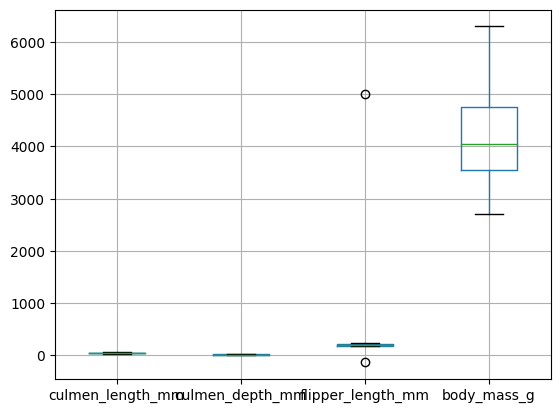

In [117]:
# Dealing with null values and outliers
penguins_df.boxplot()  
plt.show()

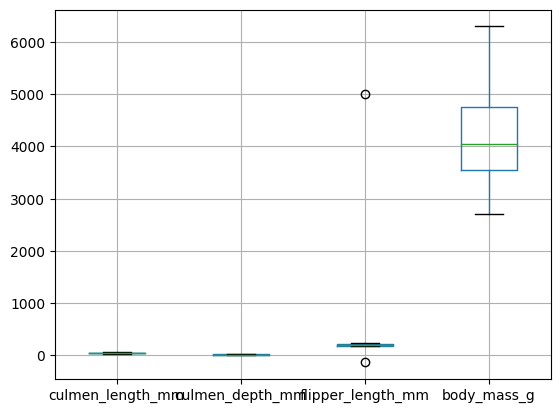

In [118]:
penguins_clean = penguins_df.dropna()
penguins_df.boxplot()
plt.show()


In [119]:
penguins_clean = penguins_df.dropna()
penguins_clean[penguins_clean['flipper_length_mm']>4000]
penguins_clean[penguins_clean['flipper_length_mm']<0]
penguins_clean = penguins_clean.drop([9,14])

In [120]:
# Performing preprocessing steps on the dataset to create dummy variables
df = pd.get_dummies(penguins_clean, columns=['sex']).drop('sex_FEMALE', axis=1)

In [121]:
# Perform preprocessing steps on the dataset - scaling
scaler = StandardScaler()
X = scaler.fit_transform(df)
penguins_preprocessed = pd.DataFrame(data=X, columns=df.columns)
penguins_preprocessed.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_.,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.054882,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,-0.054882,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,-0.054882,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,-0.054882,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.054882,0.997001
5,-0.942311,0.333002,-1.428125,-0.725033,-0.054882,-1.003008
6,-0.887125,1.253249,-0.429637,0.579691,-0.054882,0.997001
7,-0.537611,0.230753,-1.356804,-1.253136,-0.054882,-1.003008
8,-0.997497,2.071247,-0.714919,-0.507579,-0.054882,0.997001
9,-1.365406,0.333002,-1.142843,-0.631839,-0.054882,-1.003008


In [122]:
# Perform PCA
pca = PCA(n_components=None)
dfx_pca = pca.fit(penguins_preprocessed)
dfx_pca.explained_variance_ratio_
n_components=sum(dfx_pca.explained_variance_ratio_>0.1)
pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)

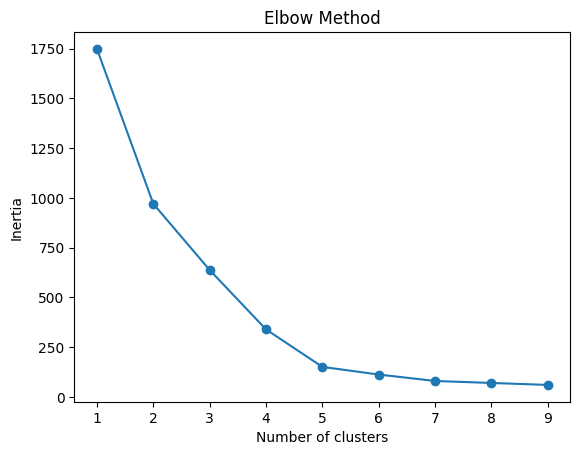

In [123]:
# Detect the optimal number of clusters for k-means clustering
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_PCA)
    inertia.append(kmeans.inertia_)
plt.plot(range(1,10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()
n_clusters=4

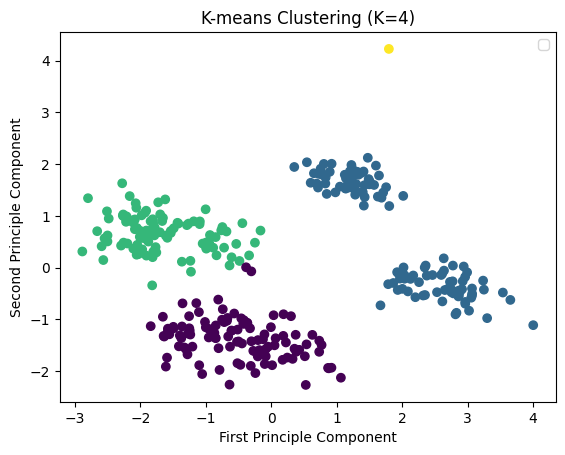

In [124]:
# Run the k-means clustering algorithm
# with the optimal number of clusters 
# and visualize the resulting clusters.
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_PCA)
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')
plt.title(f'K-means Clustering (K={n_clusters})')
plt.legend()
plt.show()

In [125]:
# Create a final statistical DataFrame for each cluster.
penguins_clean['label'] = kmeans.labels_
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']
stat_penguins = penguins_clean[numeric_columns].groupby('label').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,44.067593,19.095370,194.666667
1,47.568067,14.996639,217.235294
2,39.953333,17.599048,189.038095
3,44.500000,15.700000,217.000000
